<a href="https://colab.research.google.com/github/mariusblarsen/ae-attack-pipeline/blob/SAA-attack/SAA_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sparse-Adversarial-Attack

In [1]:
!git clone https://github.com/mariusblarsen/ae-attack-pipeline

Cloning into 'ae-attack-pipeline'...
remote: Enumerating objects: 1547, done.
remote: Counting objects: 100% (1547/1547), done.
remote: Compressing objects: 100% (1003/1003), done.
remote: Total 1547 (delta 553), reused 1507 (delta 521), pack-reused 0
Receiving objects: 100% (1547/1547), 17.58 MiB | 26.72 MiB/s, done.
Resolving deltas: 100% (553/553), done.


In [2]:
%cd ae-attack-pipeline

/content/ae-attack-pipeline


In [ ]:
!git pull origin SAA-attack

In [4]:
!git checkout -b SAA-attack

Switched to a new branch 'SAA-attack'


In [28]:
!pip install -r Tianchi04/requirements.txt

### Fetch checkpoints folder from gdrive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content
!ls

/content
ae-attack-pipeline  drive  sample_data


In [7]:
# Replace path to where the checkpoint files folder is
%cd drive/MyDrive/Studie/Prosjekttoppgave/

/content/drive/MyDrive/Studie/Prosjekttoppgave


In [8]:
%cp -av Colab\ assets checkpoints

'Colab assets' -> 'checkpoints'
'Colab assets/yolov4.cfg' -> 'checkpoints/yolov4.cfg'
'Colab assets/yolov4.weights' -> 'checkpoints/yolov4.weights'
'Colab assets/yolov4.pth' -> 'checkpoints/yolov4.pth'
'Colab assets/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth' -> 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'


In [9]:
%mv checkpoints ../../../../ae-attack-pipeline/Tianchi04/

In [10]:
%cd ../../../../ae-attack-pipeline/Tianchi04/
!ls checkpoints

/content/ae-attack-pipeline/Tianchi04
faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth  yolov4.pth
yolov4.cfg					   yolov4.weights


In [ ]:
!rm -rf ../images/.ipynb_checkpoints/

In [ ]:
!python attack_3.py --max_iter=250

In [26]:
# Copy and move newly generated files from 'final' folder to 'select1000_new_p'
import os
from google.colab import files

final_files = os.listdir("./final")
final_files.remove(".ipynb_checkpoints")

for file in final_files:
  file_path = "final/" + file
  out_dir = "select1000_new_p/" + file
  %cp -av "{file_path}" "{out_dir}"
  # files.download(file_path)  # Uncomment to download the files

'final/test.json' -> 'select1000_new_p/test.json'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# Run when eval.py gets following error:
#   IsADirectoryError: [Errno 21] Is a directory: './select1000_new/.ipynb_checkpoints'
!rm -rf ./select1000_new_p/.ipynb_checkpoints/
!rm -rf ./select1000_new/.ipynb_checkpoints/

In [ ]:
!python eval.py

# MMDet test

In [ ]:
!ls

assets	     checkpoints   improve_2.py  models.py    README.md		tool
attack_1.py  eval.py	   improve_3.py  output_data  requirements.txt	utils
attack_2.py  final	   infer.py	 pixel.json   select1000_new
attack_3.py  improve_1.py  mmdetection	 __pycache__  select1000_new_p


/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


/usr/local/lib/python3.7/dist-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_

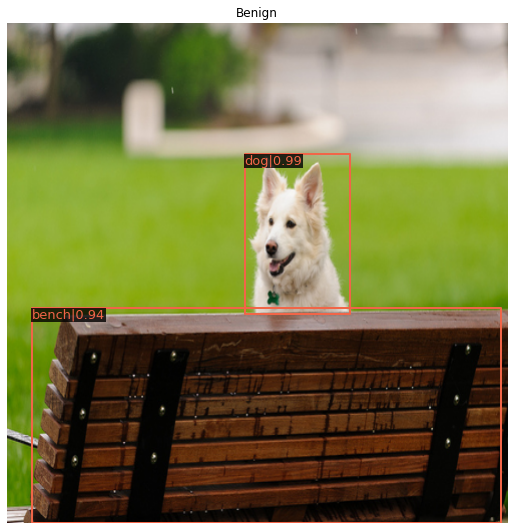

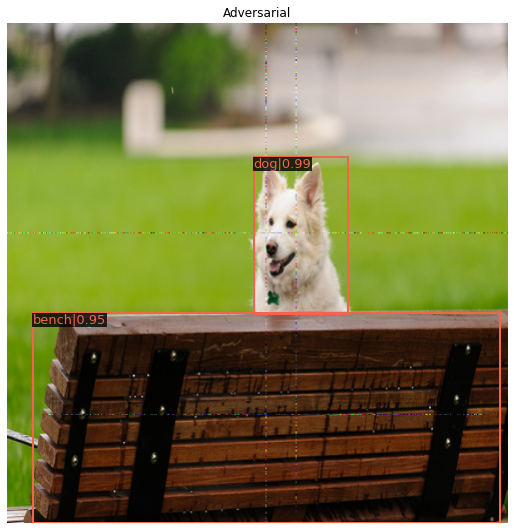

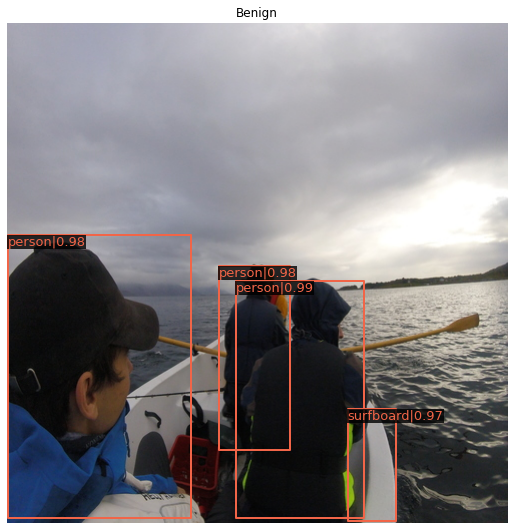

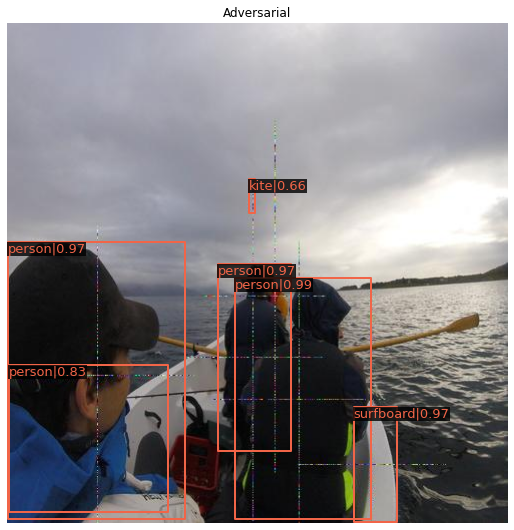

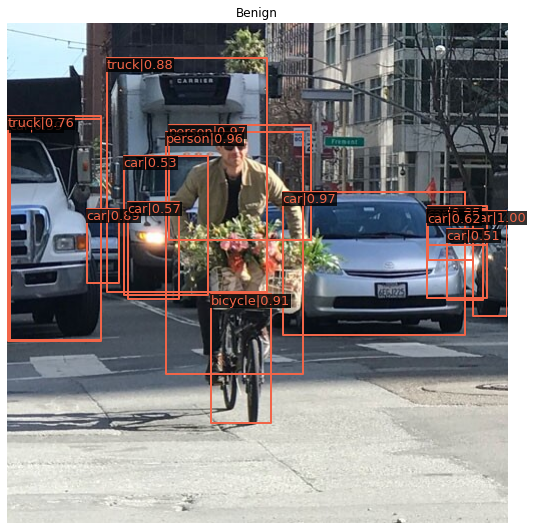

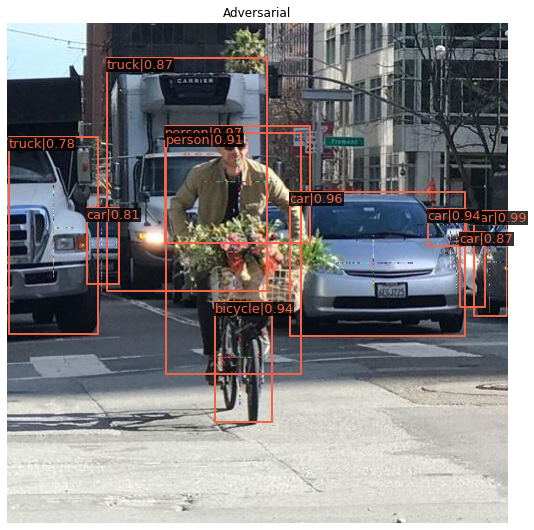

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
import os
import mmcv
import numpy as np

images = os.listdir('select1000_new/')
#images = ['1.jpg']
if '.ipynb_checkpoints' in images:
  # Removing common error
  images.remove('.ipynb_checkpoints')

# Choose to use a config and initialize the detector
config = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
# Setup a checkpoint file to load
checkpoint = './checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

for image in images:
  # Use the detector to do inference
  img0 = 'select1000_new/'+image     # Benign
  img1 = 'select1000_new_p/'+image   # Adversarial
  result0 = inference_detector(model, img0)
  result1 = inference_detector(model, img1)

  show_result_pyplot(model, img0, result0, score_thr=0.5, title="Benign")
  show_result_pyplot(model, img1, result1, score_thr=0.5, title="Adversarial")

# YOLOv4 test

In [4]:
%cd ae-attack-pipeline/Tianchi04
!ls

/content/ae-attack-pipeline
images		README.md	  SAA_demo.ipynb  Tianchi04
Pipeline.ipynb	requirements.txt  SAA-demo.ipynb  utils


In [ ]:
import torch
from torchvision import transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from utils.utils import *
import json

import numpy as np
import os
from tool.darknet2pytorch import *
from infer import infer
from tqdm import tqdm
from skimage import measure


selected_path = './select1000_new_p'
files = os.listdir(selected_path)
files.sort()

print(files)

cfgfile = "checkpoints/yolov4.cfg"
weightfile = "checkpoints/yolov4.weights"
darknet_model = Darknet(cfgfile)
darknet_model.load_weights(weightfile)
darknet_model = darknet_model.eval().cuda()

for img_name_index in tqdm(range(len(files))):
  img_name = files[img_name_index]

  img_path1 = os.path.join(selected_path, img_name)
  img1 = Image.open(img_path1).convert('RGB')


  resize_small = transforms.Compose([
      transforms.Resize((608, 608)),
  ])
  #img0 = resize_small(img0)
  img1 = resize_small(img1)

  # --------------------BOX score
  boxes1 = do_detect(darknet_model, img1, 0.5, 0.4, True)
  print("boxes1")
  print(boxes1)

# TODO: Plot the YOLOv4 detection
#show_result_pyplot(model, img, result, score_thr=0.3)